In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
engine = create_engine('sqlite:///hawaii.sqlite')

In [3]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [4]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [5]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [6]:
# Reference to classes 
Station = Base.classes.station
Measurement = Base.classes.measurement
session = Session(engine)

# Precipitation Analysis

In [7]:
#Finding the lastest data value stored in the database
lastestdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
lastestdate[0]

'2017-08-23'

In [8]:
from sqlalchemy.sql import func
import datetime as datetime
from dateutil.relativedelta import relativedelta

In [9]:
#Finding the last 12 months(a year) based on the lastest date above
last12months = datetime.datetime.strptime(lastestdate[0],"%Y-%m-%d").date()-datetime.timedelta(days=365)
last12months

datetime.date(2016, 8, 23)

In [10]:
#Retrieve data with this period(a year)
yeardata = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date.between(last12months,lastestdate[0])).all()
yeardata

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', 0.0),
 ('2016-09-06', 0.0),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 

In [11]:
#Assignning the data to Dataframe and convert the Date column from String to Date format
df = pd.DataFrame(yeardata)
df['date'] = pd.to_datetime(df['date'])
df.head(20)

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


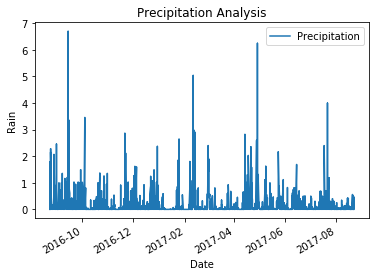

In [12]:
#Set date as index and plot out 
df.set_index(df['date'], inplace=True)
df.plot('date','prcp') 
plt.xticks(rotation=30)
plt.title("Precipitation Analysis")
plt.legend(["Precipitation"])
plt.xlabel("Date")
plt.ylabel("Rain")
plt.savefig("Precipition.png")
plt.show()


# Station Analysis


In [13]:
#Count how many stations in Station table
stationcount = session.query(Station.station).count()
print(stationcount)

9


In [14]:
#List out stations with the most active stations in descending order
from sqlalchemy import func
stationcount1 = session.query(Station.station,func.count(Measurement.station)).filter(Measurement.station==Station.station).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stationcount1

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
#Reused a year priod includes dates(lastestdate) above to come out list of temperatures for that period
last12temp = session.query(Measurement.station,Measurement.tobs).filter(Measurement.date.between(last12months,lastestdate[0])).filter(Measurement.station == stationcount1[0][0]).all()
last12temp

[('USC00519281', 77),
 ('USC00519281', 77),
 ('USC00519281', 80),
 ('USC00519281', 80),
 ('USC00519281', 75),
 ('USC00519281', 73),
 ('USC00519281', 78),
 ('USC00519281', 77),
 ('USC00519281', 78),
 ('USC00519281', 80),
 ('USC00519281', 80),
 ('USC00519281', 78),
 ('USC00519281', 78),
 ('USC00519281', 78),
 ('USC00519281', 73),
 ('USC00519281', 74),
 ('USC00519281', 80),
 ('USC00519281', 79),
 ('USC00519281', 77),
 ('USC00519281', 80),
 ('USC00519281', 76),
 ('USC00519281', 79),
 ('USC00519281', 75),
 ('USC00519281', 79),
 ('USC00519281', 78),
 ('USC00519281', 79),
 ('USC00519281', 78),
 ('USC00519281', 78),
 ('USC00519281', 76),
 ('USC00519281', 74),
 ('USC00519281', 77),
 ('USC00519281', 78),
 ('USC00519281', 79),
 ('USC00519281', 79),
 ('USC00519281', 77),
 ('USC00519281', 80),
 ('USC00519281', 78),
 ('USC00519281', 78),
 ('USC00519281', 78),
 ('USC00519281', 77),
 ('USC00519281', 79),
 ('USC00519281', 79),
 ('USC00519281', 79),
 ('USC00519281', 79),
 ('USC00519281', 75),
 ('USC0051

In [16]:
#Fetching the date into dataframe
dftemp = pd.DataFrame(last12temp)
dftemp.head()

,station,tobs
0,USC00519281,77
1,USC00519281,77
2,USC00519281,80
3,USC00519281,80
4,USC00519281,75


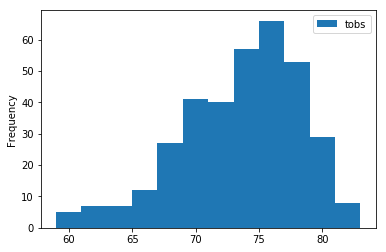

In [17]:
#Plot out with a histogram with `bins=12`
dftemp.plot.hist(bins=12)
plt.ylabel("Frequency")
plt.savefig("Histogramtemp.png")
plt.show()

# Temperature Analysis


In [18]:
#Defining a function to calculate the minimum, average, and maximum temperatures for a specific range of dates.
def calc_temps(startday,endday):
    return session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.date.between(startday,endday)).all()

In [19]:
#Set range of dates for the trip (only ta 3-15 days)
triptemp=calc_temps('2017-01-01','2017-01-17')
triptemp

[(60, 81, 68.89108910891089)]

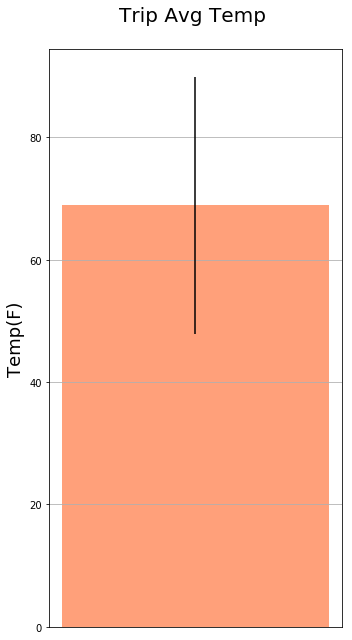

In [20]:
#Plot out with bar chart with an errorbar is range of Max temperature and Min temp
fig, ax = plt.subplots(figsize=(5,9))
ax.bar(0,triptemp[0][2], yerr=triptemp[0][1]-triptemp[0][0], align='center', color='lightsalmon')
ax.set_title('Trip Avg Temp \n',fontsize=20)
ax.set_ylabel('Temp(F)',fontsize=18)
plt.xticks([])
plt.grid()
plt.tight_layout()
plt.savefig('triptemp.png')
plt.show()

# Optional Recommended Analysis

In [21]:
#The rainfall per weather station using the previous year's matching dates
def rainfall_dates(givendatestart,givendateend):
    previousyeardatestart = datetime.datetime.strptime(givendatestart,"%Y-%m-%d").date()-datetime.timedelta(days=365)
    previousyeardateend = datetime.datetime.strptime(givendateend,"%Y-%m-%d").date()-datetime.timedelta(days=365)
    rainfalldates = session.query(Measurement.station,Measurement.prcp).filter(Measurement.date.between(previousyeardatestart,previousyeardateend)).group_by(Measurement.station).all()   
    return rainfalldates

In [22]:
#Calculating function the daily normals for a specific date
def daily_normals(givendate):
    listtempdaily = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.round(func.avg(Measurement.tobs),2)).filter(Measurement.date.like('%'+givendate+'%')).all()
    listtemp=[]
    for x in listtempdaily:
        listtemp.append(x[0])
        listtemp.append(x[1])
        listtemp.append(x[2])
    return listtemp

In [23]:
givendate = ["01-01","01-02","01-03","01-04","01-05","01-06","01-07"]
plotli = []
for x in range(len(givendate)):
    b=daily_normals(givendate[x])
    plotli.append(b)
plotli

[[62, 77, 69.15],
 [60, 77, 69.4],
 [62, 77, 68.91],
 [58, 76, 70.0],
 [56, 76, 67.96],
 [61, 76, 68.96],
 [57, 76, 68.54]]

In [24]:
mintemp = []
maxtemp=[]
avgtemp=[]
for i in plotli:
    mintemp.append(i[0])
    maxtemp.append(i[1])
    avgtemp.append(i[2])
    
dfdaily= pd.DataFrame({"Date":givendate,"TMin":mintemp,"TMax":maxtemp,"TAverage":avgtemp})
dfdaily["Date"] = "2018-"+dfdaily["Date"]
dfdaily["Date"] = pd.to_datetime(dfdaily["Date"])
dfdaily.set_index('Date',inplace=True)
dfdaily

,TMin,TMax,TAverage
Date,,,
2018-01-01,62,77,69.15
2018-01-02,60,77,69.40
2018-01-03,62,77,68.91
2018-01-04,58,76,70.00
2018-01-05,56,76,67.96
2018-01-06,61,76,68.96
2018-01-07,57,76,68.54


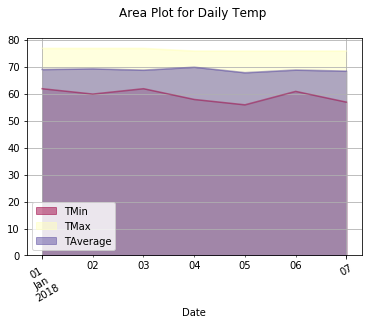

In [25]:
#dfdaily.plot(kind='area', stacked=False, alpha=0.5, colormap='Spectral',
 #       title='Area Plot for Daily Temp \n')
    
#Dont know how to disply Date.Tried a lot of ways to plot.Maybe Matplotlib get Mad :)
dfdaily.plot.area(stacked=False, alpha=0.5, colormap='Spectral',
        title='Area Plot for Daily Temp \n')
plt.xticks(rotation=30)
plt.grid()
plt.savefig("areplottemp.png")
plt.show()

# Step 4 - Climate App

In [ ]:
!pip install flask

In [ ]:
#Designning a Flask API based on the queries that you have just developed
from flask import Flask, jsonify

app = Flask(__name__)


# Flask Routes 
#"""List all available api routes."""
@app.route("/") 
def welcome():
    return ( 
         f"/List all available api routes.</br>"
         f"/api/v1.0/precipitation<br/>" 
         f"- List of last year's temperature from all stations<br/>" 
         f"/api/v1.0/stations<br/>" 
         f"- List of stations <br/>" 
         f"/api/v1.0/tobs<br/>" 
         f"- List of Temperature Observations (tobs) for the previous year<br/>" 
         f"/api/v1.0/start<br/>" 
         f"- With start date, come out the MAX, MIN and AVG temperature for all dates from that date of last year  to greater than and equal to that date<br/>" 
         f"/api/v1.0/start/end<br/>" 
         f"- With start date and the end date, come out the MAX, MIN and AVG temperature in between of those dates<br/>" 
           ) 

@app.route("/api/v1.0/precipitation")
def precipitation():
    lastestdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
    last12months = datetime.datetime.strptime(lastestdate[0],"%Y-%m-%d").date()-datetime.timedelta(days=365)
    yeartemp = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date.between(last12months,lastestdate[0])).all()
    dictionary = {}
    for x in yeartemp:
        dictionary[x[0]]=x[1]
    """Return the justice league data as json"""
    return jsonify(dictionary)

@app.route("/api/v1.0/stations")
def stations():
    station = session.query(Station.station).all()
    liststation = []
    for i in station:
        liststation.append(i[0])
    return jsonify(liststation)

@app.route("/api/v1.0/tobs")
def tobs():
    lastestdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
    last12months = datetime.datetime.strptime(lastestdate[0],"%Y-%m-%d").date()-datetime.timedelta(days=365)
    temp = session.query(Measurement.tobs).filter(Measurement.date.between(last12months,lastestdate[0])).all()
    listtemp = []
    for i in temp:
        listtemp.append(i[0])
    return jsonify(listtemp)

@app.route("/api/v1.0/<start>")
def start(startdate):
    starttemp=session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.date >= startdate).all()
    listtemp=[]
    for x in starttemp:
        listtemp.append(x[0])
        listtemp.append(x[1])
        listtemp.append(x[2])
    return jsonify(listtemp)

@app.route("/api/v1.0/<start>/<end>")
def startend(startdate,enddate):
    startendtemp = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.date.between(startdate,enddate)).all()
    listtemp=[]
    for x in startendtemp:
        listtemp.append(x[0])
        listtemp.append(x[1])
        listtemp.append(x[2])
    return jsonify(listtemp)

if __name__ == "__main__":
    app.run(debug=True)